In [1]:
import pandas as pd
import os 
import matplotlib.pyplot as plt

In [2]:
pwd

'C:\\Users\\berni\\Desktop\\portland_crime'

In [3]:
path = os.path.join("Resources", "crime_incident_data2017.csv")

In [4]:
df = pd.read_csv(path)

In [5]:
df

,Address,Case Number,Crime Against,Neighborhood,Number of Records,Occur Date,Occur Month Year,Occur Time,Offense Category,Offense Count,Offense Type,Open Data Lat,Open Data Lon,Open Data X,Open Data Y,Report Date,Report Month Year
0,NaN,17-X4762181,Person,NaN,1,1/1/96,1/1/96,800,Sex Offenses,1,Rape,NaN,NaN,NaN,NaN,1/26/17,1/1/17
1,NaN,17-X4757824,Property,Centennial,1,1/20/00,1/1/00,1615,Fraud Offenses,1,Identity Theft,NaN,NaN,NaN,NaN,1/20/17,1/1/17
2,200 BLOCK OF SE 78TH AVE,17-900367,Property,Montavilla,1,12/1/03,12/1/03,800,Fraud Offenses,1,False Pretenses/Swindle/Confidence Game,45.5207,-122.583,7668150.0,682825.0,1/9/17,1/1/17
3,NaN,17-X4748982,Property,Southwest Hills,1,1/1/10,1/1/10,0,Fraud Offenses,1,Identity Theft,NaN,NaN,NaN,NaN,1/5/17,1/1/17
4,NaN,17-X4748982,Property,Southwest Hills,1,1/1/10,1/1/10,0,Larceny Offenses,1,All Other Larceny,NaN,NaN,NaN,NaN,1/5/17,1/1/17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41027,8800 BLOCK OF NE SANDY BLVD,17-285386,Society,Sumner,1,8/31/17,8/1/17,535,Drug/Narcotic Offenses,1,Drug/Narcotic Violations,45.5554,-122.571,7671560.0,695399.0,8/31/17,8/1/17
41028,9700 BLOCK OF SE STARK ST,17-286082,Society,Hazelwood,1,8/31/17,8/1/17,1619,Prostitution Offenses,1,Prostitution,45.5191,-122.563,7673292.0,682101.0,8/31/17,8/1/17
41029,9700 BLOCK OF SE STARK ST,17-286413,Society,Hazelwood,1,8/31/17,8/1/17,1959,Prostitution Offenses,1,Prostitution,45.5191,-122.563,7673292.0,682101.0,8/31/17,8/1/17
41030,UNKNOWN ADDRESS,17-286445,Society,NaN,1,8/31/17,8/1/17,2021,Prostitution Offenses,1,Prostitution,NaN,NaN,NaN,NaN,8/31/17,8/1/17


In [6]:
df.head(1)

,Address,Case Number,Crime Against,Neighborhood,Number of Records,Occur Date,Occur Month Year,Occur Time,Offense Category,Offense Count,Offense Type,Open Data Lat,Open Data Lon,Open Data X,Open Data Y,Report Date,Report Month Year
0,NaN,17-X4762181,Person,NaN,1,1/1/96,1/1/96,800,Sex Offenses,1,Rape,NaN,NaN,NaN,NaN,1/26/17,1/1/17


In [7]:
df.shape

(41032, 17)

In [8]:
df.shape

(41032, 17)

In [9]:
df.count()

Address              37365
Case Number          41032
Crime Against        41032
Neighborhood         39712
Number of Records    41032
Occur Date           41032
Occur Month Year     41032
Occur Time           41032
Offense Category     41032
Offense Count        41032
Offense Type         41032
Open Data Lat        36712
Open Data Lon        36712
Open Data X          36712
Open Data Y          36712
Report Date          41032
Report Month Year    41032
dtype: int64

In [10]:
df.dropna().shape

(36146, 17)

In [11]:
df = pd.read_csv(path).rename(columns = lambda s: s.lower().replace(" ", "_"))\
    [['neighborhood', 
    'occur_date', 
    'occur_time',
    'offense_category', 
    'offense_count', 
    'offense_type',
    'report_date'
]].dropna()\
  .assign(report_date =lambda df : pd.to_datetime(df["report_date"], format="%m/%d/%y"))

occur_datetime = pd.to_datetime(
    df["occur_date"] + ":" + df["occur_time"].astype("str").apply(lambda s: s[:-2] + ":" + s[-2:]),
    format="%m/%d/%y:%H:%M", 
    errors ="coerce"
)

df = df.assign(occur_datetime = occur_datetime)\
    .drop("occur_date", axis = 1)\
    .drop("occur_time", axis = 1).dropna()

In [12]:
df.columns

Index(['neighborhood', 'offense_category', 'offense_count', 'offense_type',
       'report_date', 'occur_datetime'],
      dtype='object')

In [13]:
df.head()

,neighborhood,offense_category,offense_count,offense_type,report_date,occur_datetime
1,Centennial,Fraud Offenses,1,Identity Theft,2017-01-20,2000-01-20 16:15:00
2,Montavilla,Fraud Offenses,1,False Pretenses/Swindle/Confidence Game,2017-01-09,2003-12-01 08:00:00
5,King,Fraud Offenses,1,Identity Theft,2017-01-03,2010-11-28 16:12:00
6,Vernon,Fraud Offenses,1,False Pretenses/Swindle/Confidence Game,2017-01-26,2013-11-08 12:00:00
7,Vernon,Fraud Offenses,1,Identity Theft,2017-01-26,2013-11-08 12:00:00


In [14]:
df.shape

(37168, 6)

In [15]:
df.loc[df["offense_count"] > 1, "offense_count"]

141       2
256       2
984       2
2059      2
4311      2
5553      2
6310      7
6941      2
8660     16
9268      2
11707     2
12205     2
12917     2
13779     3
13813     2
15715     2
16977     2
17039     2
17443     2
18005     2
23273     2
25863     2
26446     2
26936     2
28603     3
29411     2
29564     2
30217     2
31211     2
31689     4
32305     2
32833     2
33865     2
33959     2
37279     2
37280     2
38065     2
38418     2
39514     2
Name: offense_count, dtype: int64

In [16]:
df.dtypes

neighborhood                object
offense_category            object
offense_count                int64
offense_type                object
report_date         datetime64[ns]
occur_datetime      datetime64[ns]
dtype: object

In [17]:
df["report_date"].dtype

dtype('<M8[ns]')

In [18]:
pd.to_datetime(df["report_date"], format="%m/%d/%y")

1       2017-01-20
2       2017-01-09
5       2017-01-03
6       2017-01-26
7       2017-01-26
           ...    
41026   2017-08-31
41027   2017-08-31
41028   2017-08-31
41029   2017-08-31
41031   2017-08-31
Name: report_date, Length: 37168, dtype: datetime64[ns]

In [19]:
df.dtypes

neighborhood                object
offense_category            object
offense_count                int64
offense_type                object
report_date         datetime64[ns]
occur_datetime      datetime64[ns]
dtype: object

In [20]:
df

,neighborhood,offense_category,offense_count,offense_type,report_date,occur_datetime
1,Centennial,Fraud Offenses,1,Identity Theft,2017-01-20,2000-01-20 16:15:00
2,Montavilla,Fraud Offenses,1,False Pretenses/Swindle/Confidence Game,2017-01-09,2003-12-01 08:00:00
5,King,Fraud Offenses,1,Identity Theft,2017-01-03,2010-11-28 16:12:00
6,Vernon,Fraud Offenses,1,False Pretenses/Swindle/Confidence Game,2017-01-26,2013-11-08 12:00:00
7,Vernon,Fraud Offenses,1,Identity Theft,2017-01-26,2013-11-08 12:00:00
...,...,...,...,...,...,...
41026,Parkrose,Drug/Narcotic Offenses,1,Drug/Narcotic Violations,2017-08-31,2017-08-31 20:05:00
41027,Sumner,Drug/Narcotic Offenses,1,Drug/Narcotic Violations,2017-08-31,2017-08-31 05:35:00
41028,Hazelwood,Prostitution Offenses,1,Prostitution,2017-08-31,2017-08-31 16:19:00
41029,Hazelwood,Prostitution Offenses,1,Prostitution,2017-08-31,2017-08-31 19:59:00


In [21]:
## Analysis

In [22]:
df.head()

,neighborhood,offense_category,offense_count,offense_type,report_date,occur_datetime
1,Centennial,Fraud Offenses,1,Identity Theft,2017-01-20,2000-01-20 16:15:00
2,Montavilla,Fraud Offenses,1,False Pretenses/Swindle/Confidence Game,2017-01-09,2003-12-01 08:00:00
5,King,Fraud Offenses,1,Identity Theft,2017-01-03,2010-11-28 16:12:00
6,Vernon,Fraud Offenses,1,False Pretenses/Swindle/Confidence Game,2017-01-26,2013-11-08 12:00:00
7,Vernon,Fraud Offenses,1,Identity Theft,2017-01-26,2013-11-08 12:00:00


In [23]:
#Oldest values
df["occur_datetime"].min()

Timestamp('1979-09-16 08:00:00')

In [24]:
#Time to report

In [25]:
#Most Crime Hour (by num row)

In [26]:
#Most Crime Hour (by offense_count)
df.groupby(pd.Grouper(key ="occur_datetime", freq = "1h"))["offense_count"].count().sort_values(ascending = False)

occur_datetime
2017-06-17 19:00:00    42
2017-01-01 01:00:00    25
2017-02-14 12:00:00    24
2017-05-25 20:00:00    24
2017-05-15 21:00:00    23
                       ..
2004-07-21 21:00:00     0
2004-07-21 22:00:00     0
2004-07-21 23:00:00     0
2004-07-22 00:00:00     0
1998-09-08 15:00:00     0
Name: offense_count, Length: 332752, dtype: int64

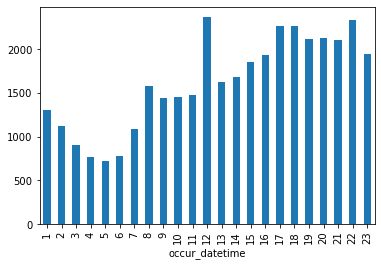

In [33]:
df.groupby(df["occur_datetime"].dt.hour)["offense_count"].sum().plot(kind = "bar")

In [28]:
#Most Crime Neighborhood
df["neighborhood"].value_counts().head(10)

Downtown               2650
Hazelwood              2484
Lents                  1422
Powellhurst-Gilbert    1355
Old Town/Chinatown     1242
Centennial             1181
Northwest              1095
Montavilla              993
Pearl                   972
Lloyd                   920
Name: neighborhood, dtype: int64

In [29]:
#Most Common Crime

In [30]:
#Most Crime Neighborhood (offense_count)
df.groupby("neighborhood")["offense_count"].max().sort_values(ascending = True)

neighborhood
Alameda                  1
Northwest Industrial     1
Northwest Heights        1
North Tabor              1
Multnomah                1
                        ..
Eastmoreland             2
Wilkes                   3
Powellhurst-Gilbert      3
Creston-Kenilworth       4
Kenton                  16
Name: offense_count, Length: 96, dtype: int64

In [31]:
df[df["offense_type"] == "Motor Vehicle Theft"]["neighborhood"].value_counts()

Hazelwood              329
Lents                  240
Powellhurst-Gilbert    194
Centennial             187
Montavilla             157
                      ... 
Woodland Park            1
Northwest Heights        1
Crestwood                1
Far Southwest            1
Maplewood                1
Name: neighborhood, Length: 90, dtype: int64